# Name: Kaushik Ghosh

# TSF Internship Task #2: Prediction using Unsupervised Machine Learning

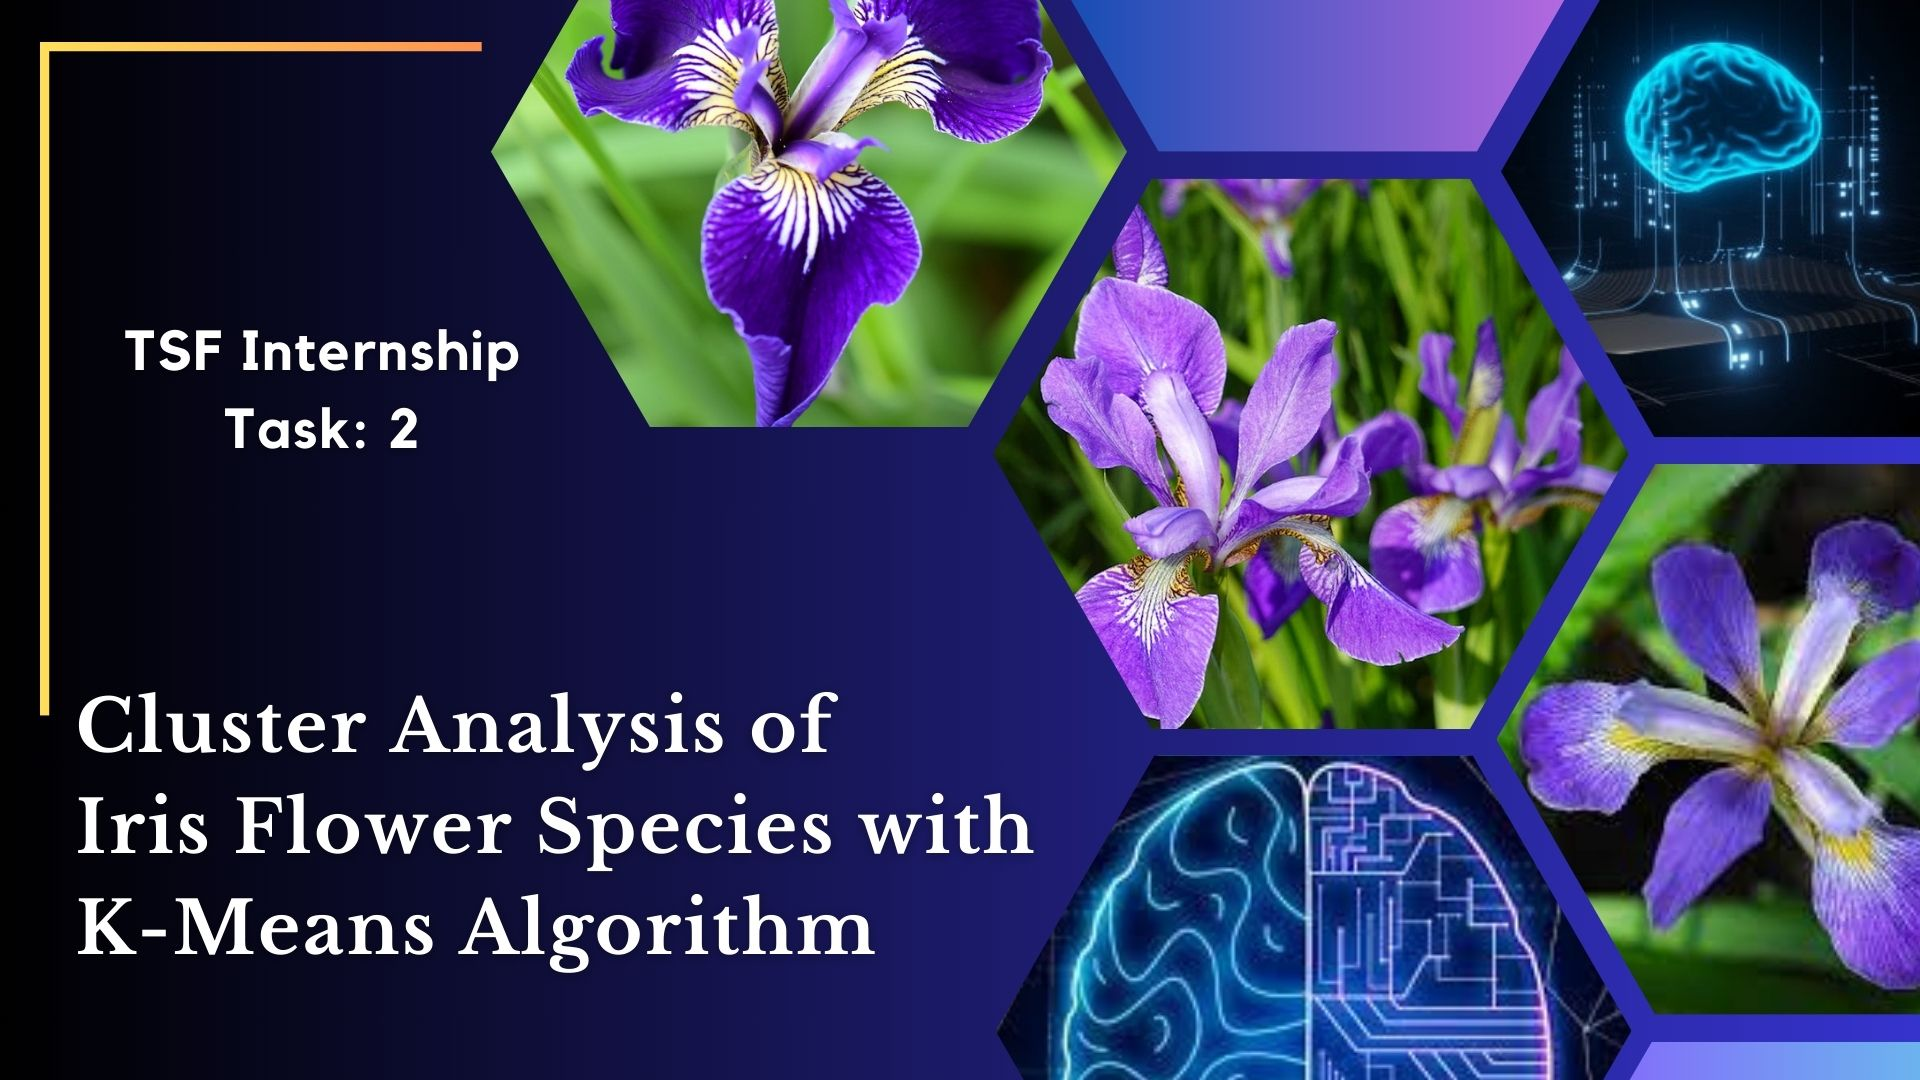

## Task Details:

Given 'Iris' dataset, predict the optimum number of clusters and respresent it visually.

Dataset: https://bit.ly/3kXTdox

## Problem Statement:

You have a dataset of Iris flowers with measurements of Id, SepalLengthCm,	SepalWidthCm,	PetalLengthCm,	PetalWidthCm and Species. Your goal is to find the optimal number of clusters in the dataset using the K-means clustering algorithm and then visualize the clusters.

## Prediction:


To determine the optimum number of clusters in the Iris dataset and visualize the results, you can use a common unsupervised machine learning technique called the "Elbow Method" with the K-means clustering algorithm.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Displaying the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [14]:
# Basic information about the dataset

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [15]:
# Summary statistics of the Dataset

iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [5]:
# Extracting feature columns (sepal length, sepal width, petal length, petal width)
X = iris_df.iloc[:, [0, 1, 2, 3]].values

# Standardizing the feature data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
# Finding the optimum number of clusters for K-means classification using the Elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

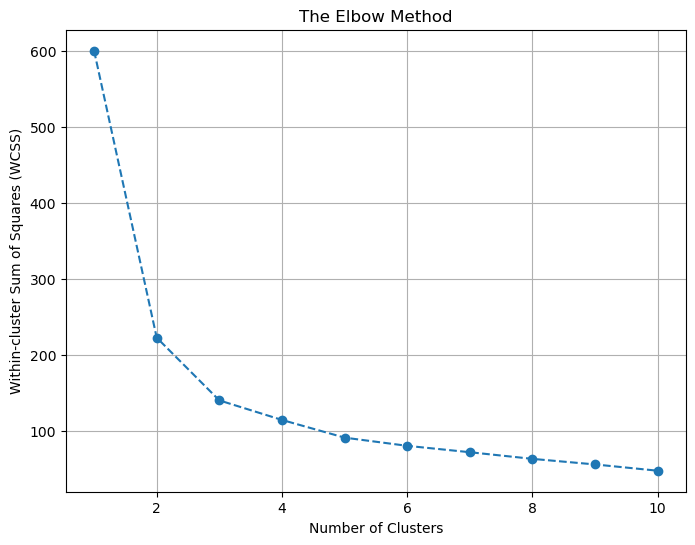

In [8]:
# Plotting the Elbow method graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [9]:
# From the Elbow method, we can see that the elbow point is at K=3

# Applying K-means clustering with the optimal number of clusters (K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_std)

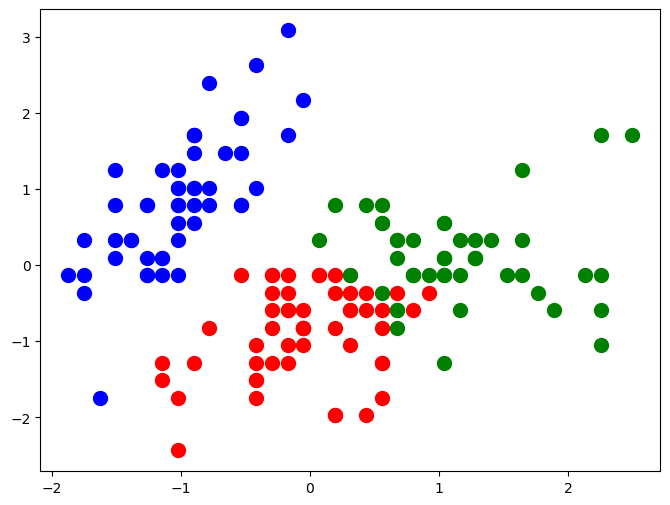

In [12]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_std[y_kmeans == 0, 0], X_std[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(X_std[y_kmeans == 1, 0], X_std[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(X_std[y_kmeans == 2, 0], X_std[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')


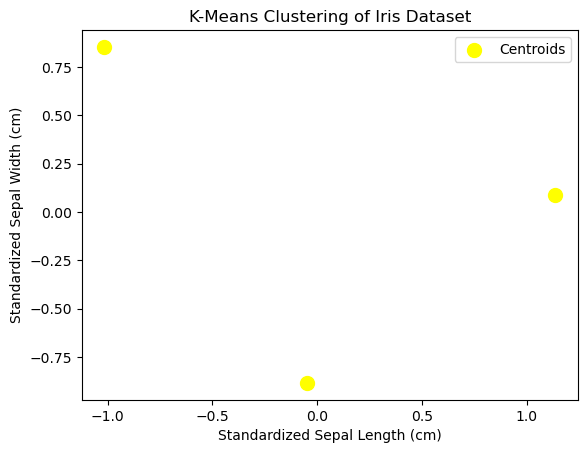

In [11]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Standardized Sepal Length (cm)')
plt.ylabel('Standardized Sepal Width (cm)')
plt.show()

## Conclution:

In conclusion, this assignment aimed to explore and apply the K-Means clustering algorithm to the Iris dataset to determine the optimal number of clusters and visualize the resulting clusters. Through the "Elbow method," we identified that the dataset's optimal number of clusters is 3, as the within-cluster sum of squares (WCSS) no longer significantly decreases beyond this point.

We successfully applied K-Means clustering with K=3 to the standardized feature data and visualized the clusters. The scatter plot displayed distinct clusters for each Iris species: Iris-setosa, Iris-versicolor, and Iris-virginica. Additionally, we marked the centroids of these clusters for reference.

This assignment demonstrates how K-Means clustering can be a valuable tool for unsupervised machine learning tasks, particularly in cases where the optimal number of clusters is not known in advance.